# Algorithm 01: Trial Run

## Requirements

In [1]:
# data wrangling
import pandas as pd
import numpy as np
from pathlib import Path
import os


# General visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Resampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight


# Models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

###MAYBE ANN
from sklearn.model_selection import GridSearchCV


# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

#Model Export
import joblib

## 1- Loading the dataset

In [2]:
base_dir = Path.cwd().parent
file_path = base_dir / "0-dataset" / "ai4i2020_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 2- Exploratory Data Analysis (EDA)

### 2.1- Overview

In [3]:
# Get overview about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
# Description of numeric features
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### 2.2- Missing Values & Duplicates

In [5]:
#Check for duplicates
data_duplicates = df.duplicated().sum()
print("Total duplicated values: ", data_duplicates)

Total duplicated values:  0


In [6]:
# Check for missing values
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


### 2.3- Data Distribution

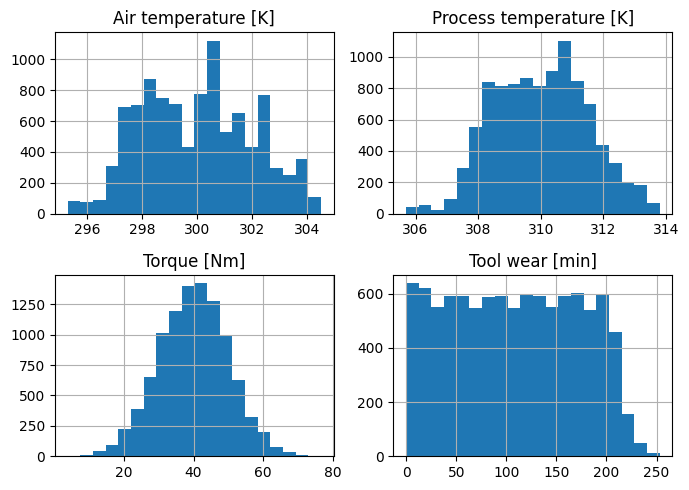

In [7]:
# Histogram of continous features
df[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']].hist(bins=20, figsize=(7, 5))
plt.tight_layout()
plt.show()

### 2.4 Exploration of Target Variable

In [8]:
# Check class balance
print(df['Machine failure'].value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64


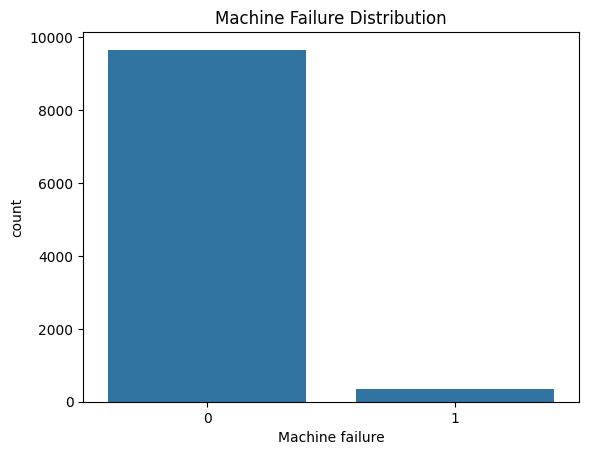

In [9]:
# Failure distribution
sns.countplot(x='Machine failure', data=df)
plt.title('Machine Failure Distribution')
plt.show()

In [10]:
#Transformation of Failure Type
failure_mapping = {
    'TWF': 'Tool Wear Failure',
    'HDF': 'Heat Dissipation Failure',
    'PWF': 'Power Failure',
    'OSF': 'Overstrain Failure',
    'RNF': 'Random Failures'
}

# Create the column: Failure Type
def determine_failure_type(row):
    for column, failure_type in failure_mapping.items():
        if row[column] == 1:
            return failure_type
    return 'No Failure'

df['Failure Type'] = df.apply(determine_failure_type, axis=1)

df.drop(columns=failure_mapping.keys(), inplace=True)

In [11]:
# Check the updated DataFrame
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [12]:
# Proportion of machine failure types
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     115
Power Failure                 91
Overstrain Failure            78
Tool Wear Failure             46
Random Failures               18
Name: count, dtype: int64

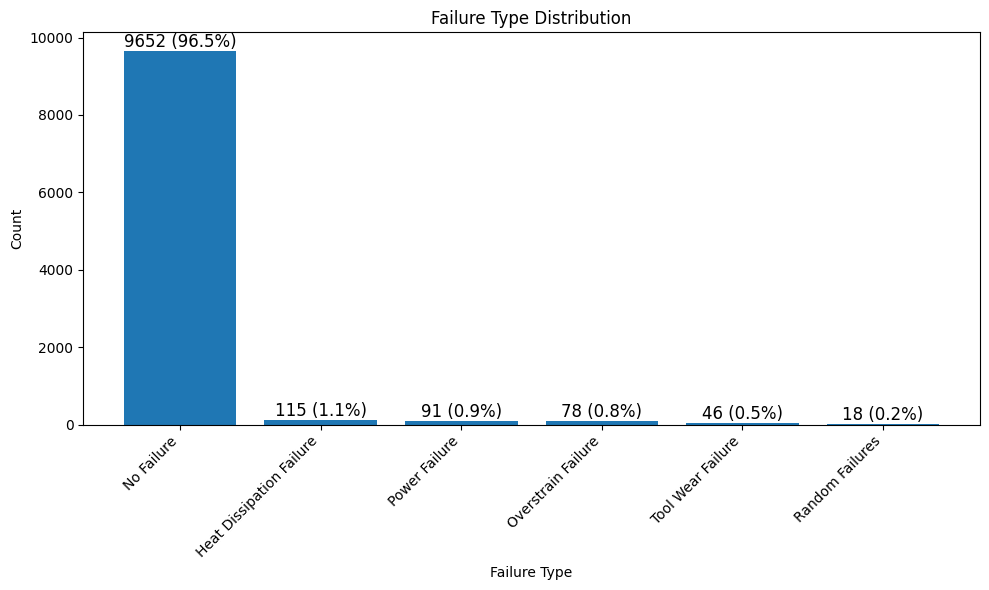

In [13]:
# Count occurrences and calculate percentages
failure_counts = df['Failure Type'].value_counts()
failure_percentages = (failure_counts / failure_counts.sum()) * 100  # Convert to percentages

# Plot the failure type distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.index, failure_counts.values)

# labels with both count and percentage
for bar, count, percentage in zip(bars, failure_counts.values, failure_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{count} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=12)

# Labels and title
plt.title("Failure Type Distribution", fontsize=12)
plt.xlabel("Failure Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

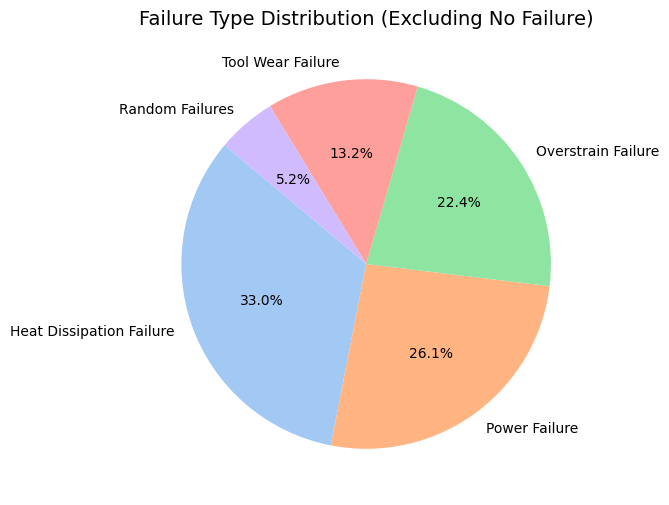

In [14]:
# piechart of exlusively failure type distribution
failure_only_df = df[df['Failure Type'] != 'No Failure']
failure_counts = failure_only_df['Failure Type'].value_counts()

# Pie Chart for Failures Distribution
plt.figure(figsize=(6, 6))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=140)
plt.title('Failure Type Distribution (Excluding No Failure)', fontsize=14)
plt.show()

## 3- Feature Engineering & Data Preprocessing

In [15]:
# Renaming of columns
rename_columns = {
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Machine failure': 'Machine_failure',
    'Failure Type': 'Failure_type'    
}

df.rename(rename_columns, axis = 1, inplace = True)

In [16]:
## Renaming the classes
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}

df['Type'] = df['Type'].replace(rename_type)


### 3.1 Identify redundant rows

In [17]:
# Analysing redundance value, count failures on 'Machine failure' column
count_failures = (df['Machine_failure'] == 1).sum()
print('Number of failures:', count_failures)

# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Machine_failure'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

Number of failures: 339
Sum of failures different of "No Failure": 330


### 3.2 Remove redunant rows

In [18]:
# Filter the rows with has 1 in the column "Machine failure" and 'No Failure' in the column 'Failure_type'
rows_to_remove = df[(df['Machine_failure'] == 1) & (df['Failure_type'] == 'No Failure')]

# Remove this filtered row in the main df
df.drop(rows_to_remove.index, inplace=True)

### 3.3 Remove unnecessary columns

In [19]:
drop_columns = ["ID", "Product_ID", "Machine_failure"]
df.drop(drop_columns, axis = 1, inplace = True)

### 3.4 Elimination of random (unpredictable) failures

In [20]:
df = df.loc[df['Failure_type'] != 'Random Failures']

### 3.5 Data Preprocessing

In [21]:
numeric_features = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
categoric_features = ['Machine_failure']

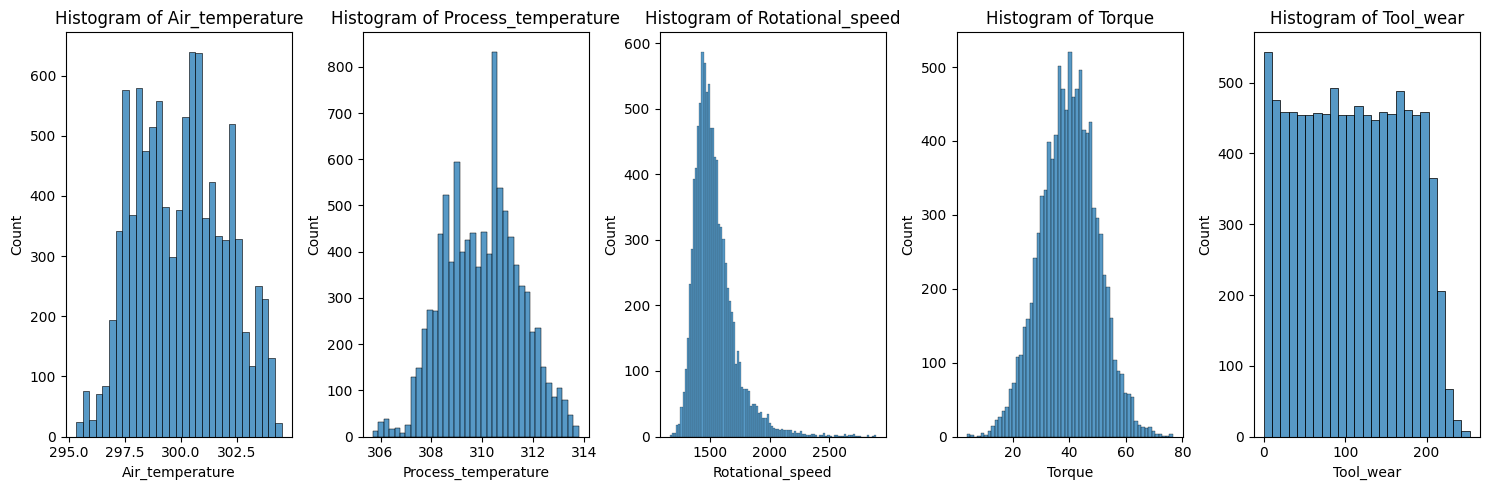

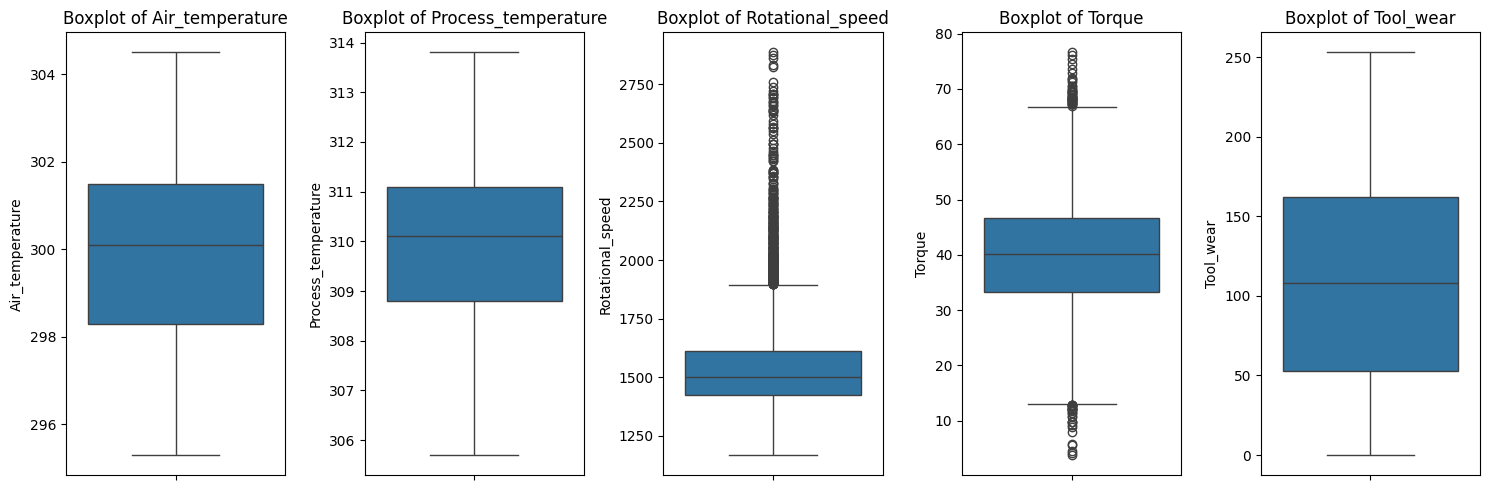

In [22]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(15, 5))

# Plot histograms 
for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

# Adjust subplot 
plt.tight_layout()

# Show histogram 
plt.show()

# Create the figure and axess
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(15, 5))

# Plot boxplot side by side
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Adjust subplot
plt.tight_layout()

# Show boxplots
plt.show()

#### Train-Test Split & One Hot Encoding

In [23]:
label_encoder = LabelEncoder()
df['Failure_type'] = label_encoder.fit_transform(df['Failure_type'])

X = df[numeric_features]
y = df['Failure_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

print(f"Training size: {X_train.shape}")
print(f"Testing size: {X_test.shape}")

Training size: (7978, 5)
Testing size: (1995, 5)


#### Pre-Processing Pipeline (Scaling)

In [24]:
# Numeric preprocesisng pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

## 4- Modeling

In [25]:
def get_metrics(y_true, y_pred):
    """Return a structured dictionary of classification metrics."""
    
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None, zero_division=1)

    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro', zero_division=1),
        'Macro Precision': precision_score(y_true, y_pred, average='macro', zero_division=1),
        'Macro F1': f1_score(y_true, y_pred, average='macro', zero_division=1),
        'F1 Scores per Class': f1_scores_per_class
    }
    
    # Print the metrics with line breaks for better readability
    print("\nModel Performance Metrics")
    print(f"Accuracy:            {dict_metrics['Accuracy']:.4f}")
    print(f"Balanced Accuracy:   {dict_metrics['Balanced Accuracy']:.4f}")
    print(f"Macro Recall:        {dict_metrics['Macro Recall']:.4f}")
    print(f"Macro Precision:     {dict_metrics['Macro Precision']:.4f}")
    print(f"Macro F1 Score:      {dict_metrics['Macro F1']:.4f}")

    print("\nF1 Scores Per Class:")
    for i, score in enumerate(f1_scores_per_class):
        print(f"Class {i}: {score:.4f}")

    return dict_metrics

### 4.1 Logistic Regression (Baseline Model)

In [26]:
# Train logistic regression model
logreg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Fit Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred_logreg = logreg_pipeline.predict(X_test)
metrics_logreg = get_metrics(y_test, y_pred_logreg)


Model Performance Metrics
Accuracy:            0.8892
Balanced Accuracy:   0.9157
Macro Recall:        0.9157
Macro Precision:     0.4474
Macro F1 Score:      0.5438

F1 Scores Per Class:
Class 0: 0.4884
Class 1: 0.9404
Class 2: 0.6154
Class 3: 0.5806
Class 4: 0.0940


### 4.2 Random Forest Classifier (Intermediate Model)

In [27]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit Random Forest pipeline
rf_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf_pipeline.predict(X_test)
metrics_rf = get_metrics(y_test, y_pred_rf)


Model Performance Metrics
Accuracy:            0.9734
Balanced Accuracy:   0.8212
Macro Recall:        0.8212
Macro Precision:     0.6505
Macro F1 Score:      0.7070

F1 Scores Per Class:
Class 0: 0.9545
Class 1: 0.9869
Class 2: 0.7317
Class 3: 0.6800
Class 4: 0.1818


#### Feature Importance Analysis

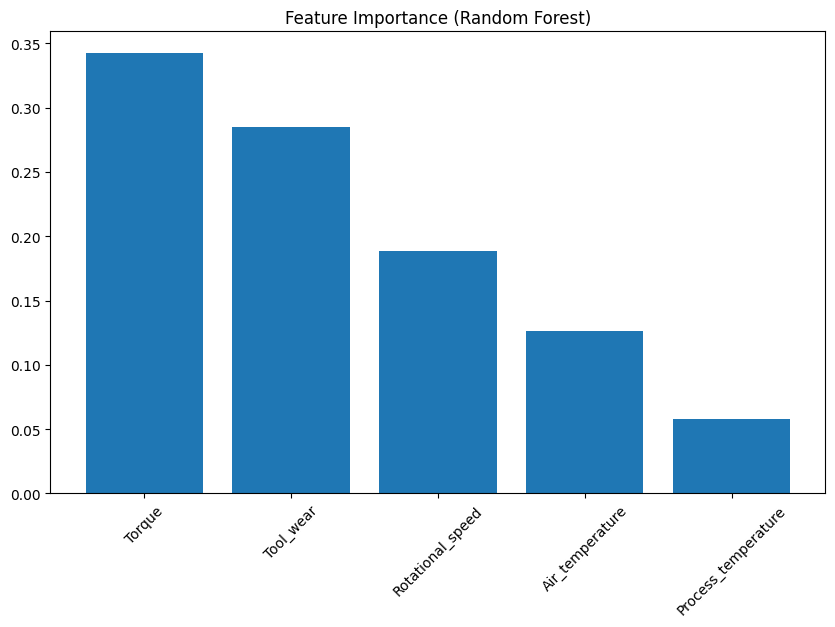

In [28]:
# Extract the trained RandomForestClassifier from the pipeline
rf_model = rf_pipeline.named_steps['classifier']

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plotting of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 4.3 Gradient Boosting Classifier

In [29]:
# Get categorical feature indices for SMOTENC
categorical_features_indices = [i for i, feature in enumerate(numeric_features + categoric_features) 
                                if feature in categoric_features]

# Creating the new pipeline with SMOTE
pip_model_smote_gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pip_model_smote_gbc.fit(X_train, y_train)

# Generate Predictions
y_pred = pip_model_smote_gbc.predict(X_test)

# Evaluate Metrics
gdb_metrics = get_metrics(y_test, y_pred)


Model Performance Metrics
Accuracy:            0.9474
Balanced Accuracy:   0.9077
Macro Recall:        0.9077
Macro Precision:     0.5979
Macro F1 Score:      0.6732

F1 Scores Per Class:
Class 0: 0.9583
Class 1: 0.9729
Class 2: 0.5909
Class 3: 0.6792
Class 4: 0.1647


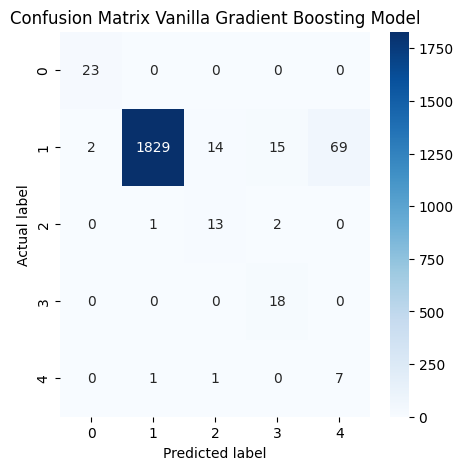

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_pred))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Vanilla Gradient Boosting Model')
plt.show()

### Comparison of performance: vanilla models

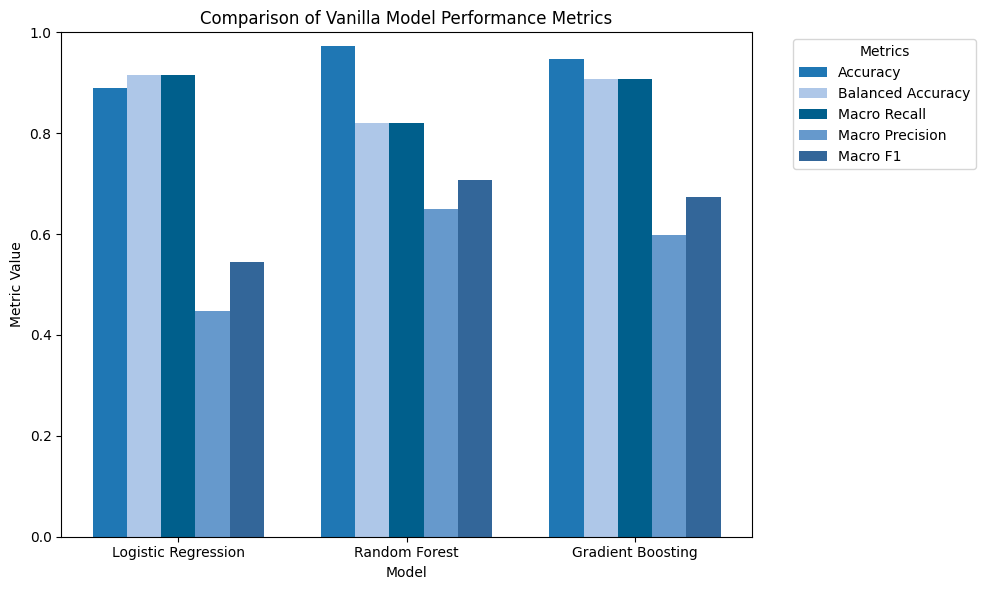

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the metric keys you want to compare (excluding "F1 Scores per Class")
metrics_to_plot = ['Accuracy', 'Balanced Accuracy', 'Macro Recall', 'Macro Precision', 'Macro F1']

# Create a dictionary that maps each model to its metrics (automatically extracted)
data = {
    'Logistic Regression': {key: metrics_logreg[key] for key in metrics_to_plot},
    'Random Forest': {key: metrics_rf[key] for key in metrics_to_plot},
    'Gradient Boosting': {key: gdb_metrics[key] for key in metrics_to_plot}
}

# Convert the dictionary to a DataFrame and transpose so that each row represents a model
results = pd.DataFrame(data).T
results.reset_index(inplace=True)
results.rename(columns={'index': 'Model'}, inplace=True)

# Define a blue color palette for the metrics (one color per metric)
blue_colors = ['#1f77b4', '#aec7e8', '#005f8c', '#6699cc', '#336699']

# Plotting the grouped bar chart using blue tones
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(results))  # one tick per model
bar_width = 0.15

# Create bars for each metric using the corresponding blue color
for i, metric in enumerate(metrics_to_plot):
    ax.bar([p + i * bar_width for p in x],
           results[metric],
           width=bar_width,
           color=blue_colors[i],
           label=metric)

# Set the x-axis tick labels to be the model names
ax.set_xticks([p + bar_width * (len(metrics_to_plot) - 1) / 2 for p in x])
ax.set_xticklabels(results['Model'])

# Labeling the plot
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.title("Comparison of Vanilla Model Performance Metrics")
plt.ylim(0, 1)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


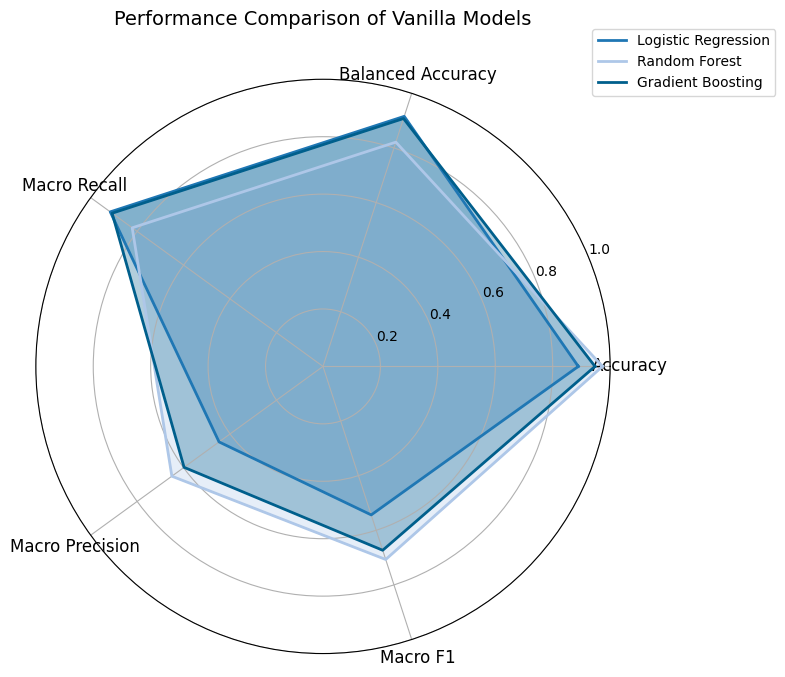

In [32]:
metrics_to_plot = ['Accuracy', 'Balanced Accuracy', 'Macro Recall', 'Macro Precision', 'Macro F1']

# Extract the values from each model's metrics dictionary
data = {
    'Logistic Regression': [metrics_logreg[m] for m in metrics_to_plot],
    'Random Forest': [metrics_rf[m] for m in metrics_to_plot],
    'Gradient Boosting': [gdb_metrics[m] for m in metrics_to_plot]
}

# Radar chart requires the data to be "closed" (the first value repeated at the end)
def close_circle(values):
    return values + values[:1]

# Number of metrics
num_metrics = len(metrics_to_plot)

# Calculate the angle for each axis in the plot (in radians)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Create the radar chart plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Define a blue color palette
colors = ['#1f77b4', '#aec7e8', '#005f8c']  # e.g., standard blue, light blue, and a darker blue

# Plot each model's metrics on the radar chart
for i, (model, values) in enumerate(data.items()):
    values_closed = close_circle(values)
    ax.plot(angles, values_closed, color=colors[i], linewidth=2, label=model)
    ax.fill(angles, values_closed, color=colors[i], alpha=0.3)

# Set the labels for each axis
ax.set_thetagrids(np.degrees(angles[:-1]), metrics_to_plot, fontsize=12)

# Set the range of the radial axis
ax.set_ylim(0, 1)

# Add title and legend
plt.title("Performance Comparison of Vanilla Models", y=1.08, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


## 5. Optimization

### 5.1 GridSearchVC

In [33]:
# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_gbc.fit(X_train, y_train, model__sample_weight=weights)

# Updated parameters for GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=42),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42)
    ],
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_gbc, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params = results.loc[best_model_index, 'params']

print("Best model:")
print(best_model_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best model:
{'model': GradientBoostingClassifier(random_state=42)}


In [34]:
# Extract the best model
best_model = grid.best_estimator_

# Fit the best model on the full training set
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate performance
metrics_best = get_metrics(y_test, y_pred_best)


Model Performance Metrics
Accuracy:            0.9845
Balanced Accuracy:   0.6621
Macro Recall:        0.6621
Macro Precision:     0.6811
Macro F1 Score:      0.6702

F1 Scores Per Class:
Class 0: 0.9545
Class 1: 0.9930
Class 2: 0.6667
Class 3: 0.7368
Class 4: 0.0000


In [35]:
best_pipeline = grid.best_estimator_
best_model = best_pipeline.named_steps['model']

In [36]:
# Predict on test set
y_pred = best_pipeline.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9845
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.99      0.99      0.99      1929
           2       0.71      0.62      0.67        16
           3       0.70      0.78      0.74        18
           4       0.00      0.00      0.00         9

    accuracy                           0.98      1995
   macro avg       0.68      0.66      0.67      1995
weighted avg       0.98      0.98      0.98      1995



#### Confusion Matrix

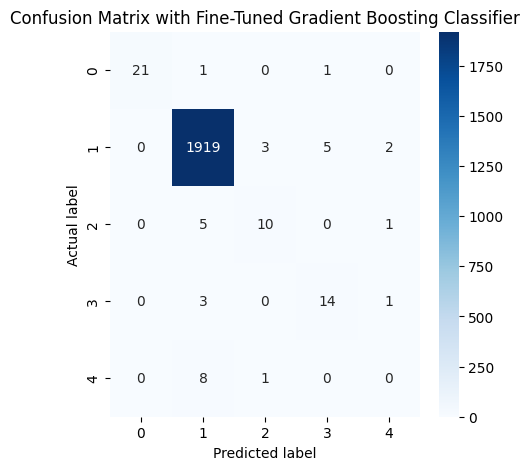

In [37]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_pred))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned Gradient Boosting Classifier')
plt.show()

### 5.2 Hyperparameter Tuning

#### RandomSearch VC

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': [0.6, 0.8, 1.0]
}

In [40]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    best_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_macro',  
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearch on training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_hyperparams = random_search.best_params_
print("Best Hyperparameters:", best_hyperparams)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 251, 'subsample': 1.0}


In [ ]:
# Extract the best model with tuned hyperparameters
best_gbc_tuned = GradientBoostingClassifier(**best_hyperparams, random_state=42)

# Train with the best parameters
best_gbc_tuned.fit(X_train, y_train)

# Predictions on test data
y_pred_tuned = best_gbc_tuned.predict(X_test)
metrics_gbc_tuned = get_metrics(y_test, y_pred_tuned)

# Evaluate
print("Tuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))



Model Performance Metrics
Accuracy:            0.9845
Balanced Accuracy:   0.6655
Macro Recall:        0.6655
Macro Precision:     0.6709
Macro F1 Score:      0.6668

F1 Scores Per Class:
Class 0: 0.9787
Class 1: 0.9928
Class 2: 0.5517
Class 3: 0.8108
Class 4: 0.0000
Tuned Model Performance:
Accuracy: 0.9844611528822055
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.99      0.99      0.99      1929
           2       0.62      0.50      0.55        16
           3       0.79      0.83      0.81        18
           4       0.00      0.00      0.00         9

    accuracy                           0.98      1995
   macro avg       0.67      0.67      0.67      1995
weighted avg       0.98      0.98      0.98      1995



### 5.3 Comparison

In [42]:
print("\nBefore Tuning:")
print(metrics_best)

print("\nAfter Tuning:")
print(metrics_gbc_tuned)


Before Tuning:
{'Accuracy': 0.9844611528822055, 'Balanced Accuracy': 0.662127444572167, 'Macro Recall': 0.662127444572167, 'Macro Precision': 0.6811009445100356, 'Macro F1': 0.6702136913493896, 'F1 Scores per Class': array([0.95454545, 0.99301423, 0.66666667, 0.73684211, 0.        ])}

After Tuning:
{'Accuracy': 0.9844611528822055, 'Balanced Accuracy': 0.665526179367548, 'Macro Recall': 0.665526179367548, 'Macro Precision': 0.6708812206425426, 'Macro F1': 0.666802395237114, 'F1 Scores per Class': array([0.9787234 , 0.99275362, 0.55172414, 0.81081081, 0.        ])}


#### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best tuned model
cv_scores = cross_val_score(best_gbc_tuned, X_train, y_train, cv=5, scoring='f1_macro')

# Print results
print(f"Cross-validation F1-macro scores: {cv_scores}")
print(f"Mean F1-macro: {np.mean(cv_scores):.4f}")


Cross-validation F1-macro scores: [0.72317544 0.73639632 0.63957497 0.68584111 0.68873399]
Mean F1-macro: 0.6947


#### Final Confusion Matrix

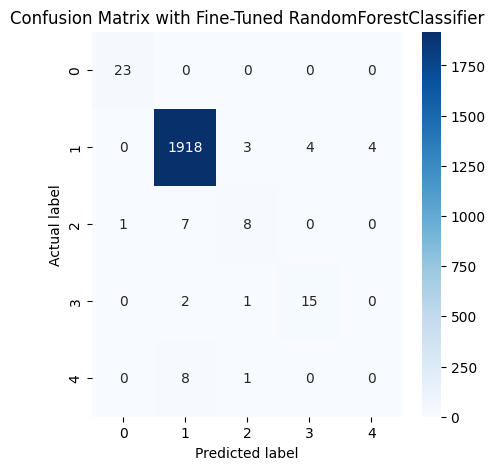

In [44]:
# Generate the confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_pred_tuned))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned RandomForestClassifier')
plt.show()

## 6- Best Model Export

In [45]:
# Save the fine-tuned Gradient Boosting model
joblib.dump(best_gbc_tuned, "best_gradient_boosting_model.pkl")

# Load the model later when needed
best_gbc_tuned = joblib.load("best_gradient_boosting_model.pkl")

## 7- Optional (Overfitting Check)

In [ ]:
# Overfitting Check 
y_train_pred = best_gbc_tuned.predict(X_train)

# Get test predictions
y_test_pred = best_gbc_tuned.predict(X_test)

# Compute metrics for training data
metrics_train = get_metrics(y_train, y_train_pred)

# Compute metrics for test data
metrics_test = get_metrics(y_test, y_test_pred)

# Print comparison
print("\nTraining Performance:")
print(metrics_train)

print("\nTest Performance:")
print(metrics_test)



Model Performance Metrics
Accuracy:            1.0000
Balanced Accuracy:   1.0000
Macro Recall:        1.0000
Macro Precision:     1.0000
Macro F1 Score:      1.0000

F1 Scores Per Class:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 1.0000
Class 3: 1.0000
Class 4: 1.0000

Model Performance Metrics
Accuracy:            0.9845
Balanced Accuracy:   0.6655
Macro Recall:        0.6655
Macro Precision:     0.6709
Macro F1 Score:      0.6668

F1 Scores Per Class:
Class 0: 0.9787
Class 1: 0.9928
Class 2: 0.5517
Class 3: 0.8108
Class 4: 0.0000

Training Performance:
{'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'Macro Recall': 1.0, 'Macro Precision': 1.0, 'Macro F1': 1.0, 'F1 Scores per Class': array([1., 1., 1., 1., 1.])}

Test Performance:
{'Accuracy': 0.9844611528822055, 'Balanced Accuracy': 0.665526179367548, 'Macro Recall': 0.665526179367548, 'Macro Precision': 0.6708812206425426, 'Macro F1': 0.666802395237114, 'F1 Scores per Class': array([0.9787234 , 0.99275362, 0.55172414, 0.81081081, 0.    